# Prelimineries

Source Dataset : [Diabetes-Prediction-Dataset - iammustafatz](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

## About Dataset

The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative).

The data includes features such as :
1. **Age**  
2. **Gender**
3. **Body Mass Index (BMI)**
4. **Hypertension**
5. **Heart Disease**
6. **Smoking History**
7. **HbA1c Level**
8. **Blood Glucose Level**

This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information.

This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.

Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

# Introduction

## Import Libraries

In [ ]:
# Library for calculation
import numpy as np

# Library for data manipulation
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

# Libraries for data imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

## Input Data

In [ ]:
# Read the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/KAGGLE/Diabetes/diabetes_prediction_dataset.csv')

# Display the dimension of data (number of rows, number of columns)
print(df.shape, '\n')

# Display the dataset in 5 rows
df.head()

(100000, 9) 



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## A. Exploratory Data Analysis (EDA)

### 1. Data Quality

In [ ]:
# Data Information -> Data type, number of data in each features, name of features, etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
# Checking the missing value in each features

df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

#### I. Duplicates

In [ ]:
# We look how many duplicated data in the dataset
duplicate_rows_data = df[df.duplicated()]
print(duplicate_rows_data.shape)

(3854, 9)


In [ ]:
# There are 3854 duplicated datas, then drop it
df = df.drop_duplicates()

In [ ]:
# After drop the duplicates, then we look the new dimension of dataset
print(df.shape)

(96146, 9)


#### II. Data Uniqueness

In [ ]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column} : {num_distinct_values} distinct values \n")

gender : 3 distinct values 

age : 102 distinct values 

hypertension : 2 distinct values 

heart_disease : 2 distinct values 

smoking_history : 6 distinct values 

bmi : 4247 distinct values 

HbA1c_level : 18 distinct values 

blood_glucose_level : 18 distinct values 

diabetes : 2 distinct values 



In [ ]:
# categorical feature uniqueness
cat_data = df[['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']]

for cat in cat_data.columns:
    print(f"{cat} : {df[cat].unique()} \n")

gender : ['Female' 'Male' 'Other'] 

hypertension : [0 1] 

heart_disease : [1 0] 

smoking_history : ['never' 'No Info' 'current' 'former' 'ever' 'not current'] 

diabetes : [0 1] 



In [ ]:
for cat in cat_data.columns:
    print(f"{cat} :\n{df[cat].value_counts()} \n")

gender :
Female    56161
Male      39967
Other        18
Name: gender, dtype: int64 

hypertension :
0    88685
1     7461
Name: hypertension, dtype: int64 

heart_disease :
0    92223
1     3923
Name: heart_disease, dtype: int64 

smoking_history :
never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64 

diabetes :
0    87664
1     8482
Name: diabetes, dtype: int64 



In [ ]:
# numerical feature uniqueness
num_data = df[['HbA1c_level', 'blood_glucose_level']]

for num in num_data.columns:
    print(f"{num} : {df[num].unique()} \n")

HbA1c_level : [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8] 

blood_glucose_level : [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220 300 280 240] 



In [ ]:
# numerical feature uniqueness (Age) -> to check other values besides float data type
for i in df['age'].unique():
  try:
    float(i)
  except:
    print(i)

In [ ]:
# numerical feature uniqueness (BMI) -> to check other values besides float data type
for i in df['bmi'].unique():
  try:
    float(i)
  except:
    print(i)

#### III. Data Removing

In [ ]:
df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [ ]:
# Remove Unneccessary value [0.00195 %]
df = df[df['gender'] != 'Other']

#### IV. Describe the data

In [ ]:
df.describe().style.format("{:.2f}")

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00,96128.00
mean,41.80,0.08,0.04,27.32,5.53,138.22,0.09
std,22.46,0.27,0.20,6.77,1.07,40.91,0.28
min,0.08,0.00,0.00,10.01,3.50,80.00,0.00
25%,24.00,0.00,0.00,23.40,4.80,100.00,0.00
50%,43.00,0.00,0.00,27.32,5.80,140.00,0.00
75%,59.00,0.00,0.00,29.86,6.20,159.00,0.00
max,80.00,1.00,1.00,95.69,9.00,300.00,1.00


#### V. Data Information After Checking

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96128 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96128 non-null  object 
 1   age                  96128 non-null  float64
 2   hypertension         96128 non-null  int64  
 3   heart_disease        96128 non-null  int64  
 4   smoking_history      96128 non-null  object 
 5   bmi                  96128 non-null  float64
 6   HbA1c_level          96128 non-null  float64
 7   blood_glucose_level  96128 non-null  int64  
 8   diabetes             96128 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


### 2. Univariate

#### Numerical
* Age
* BMI
* HbA1c Level
* Blood Glucose Level


##### I. Age

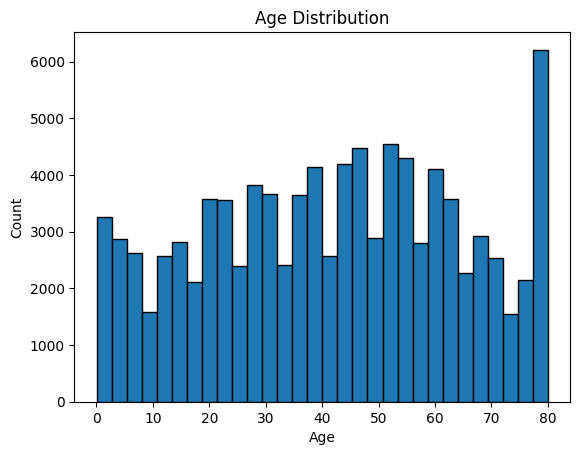

In [ ]:
# Histogram for age
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-19-6e43198c5ccd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=30)


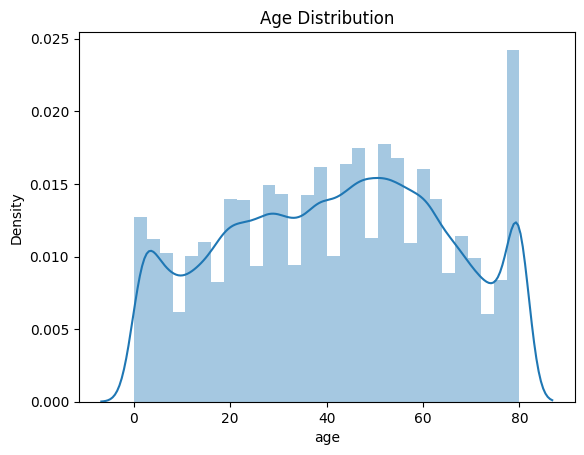

In [ ]:
# Distribution Plot for Age
sns.distplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.show()

##### II. BMI

<ipython-input-20-ae0b3087fbd8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'], bins=30)


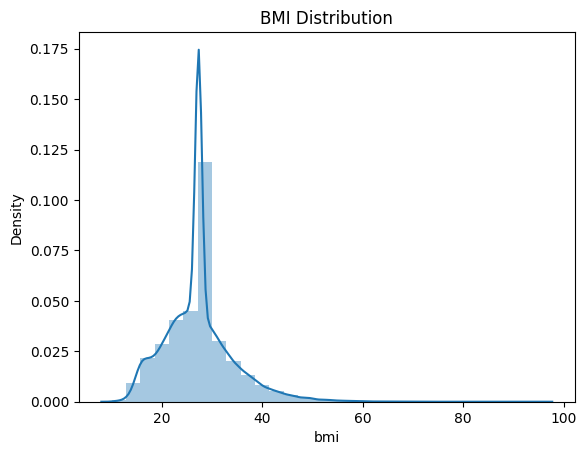

In [ ]:
# Distribution plot for BMI
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

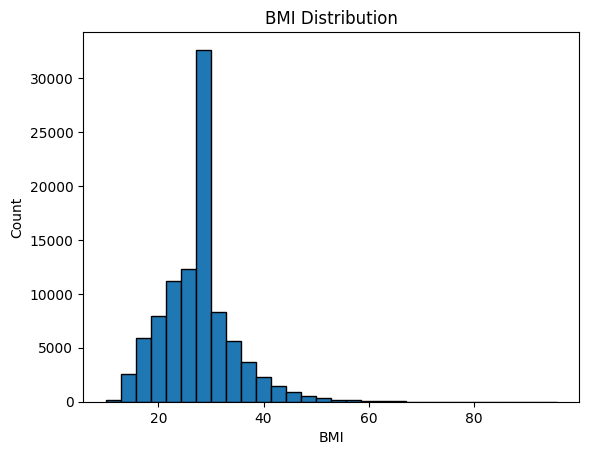

In [ ]:
# Histogram for BMI
plt.hist(df['bmi'], bins=30, edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

##### III. HbA1c Level

<ipython-input-22-11f49b7c5a10>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HbA1c_level'], bins=30)


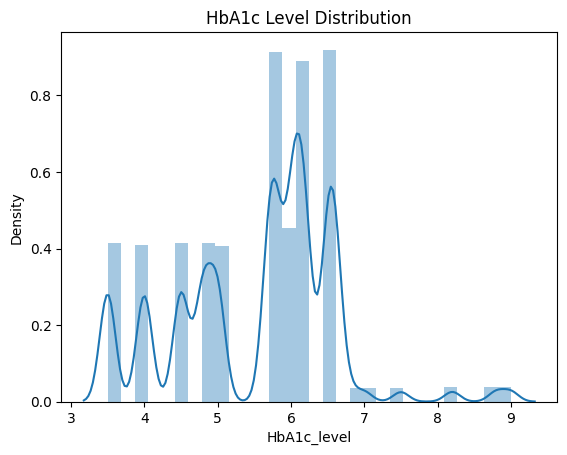

In [ ]:
# Distribution plot for HbA1c Level
sns.distplot(df['HbA1c_level'], bins=30)
plt.title('HbA1c Level Distribution')
plt.show()

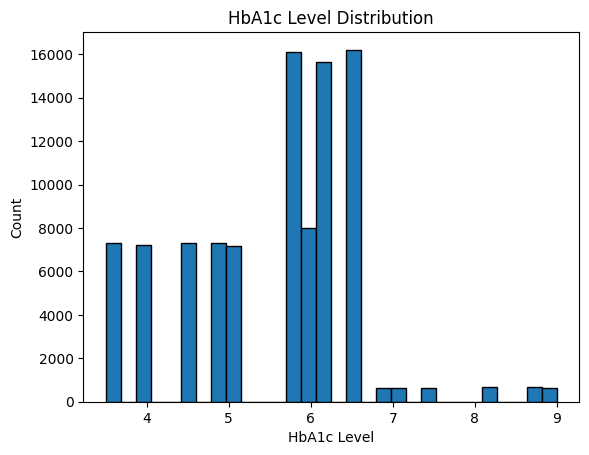

In [ ]:
# Histogram for Blood Glucose Level
plt.hist(df['HbA1c_level'], bins=30, edgecolor='black')
plt.title('HbA1c Level Distribution')
plt.xlabel('HbA1c Level')
plt.ylabel('Count')
plt.show()

##### IV. Blood Glucose Level

<ipython-input-24-a2a39d3fe468>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['blood_glucose_level'], bins=30)


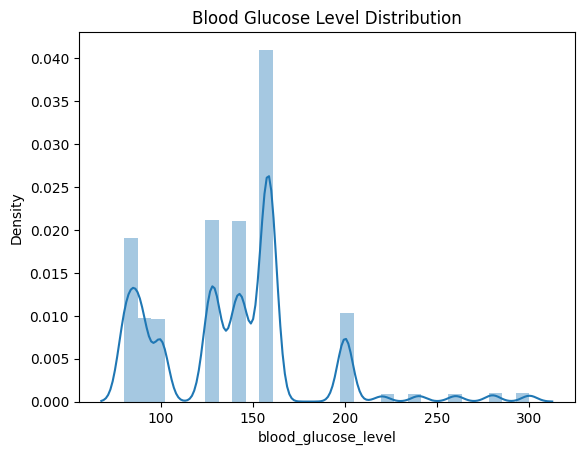

In [ ]:
# Distribution plot for Blood Glucose Level
sns.distplot(df['blood_glucose_level'], bins=30)
plt.title('Blood Glucose Level Distribution')
plt.show()

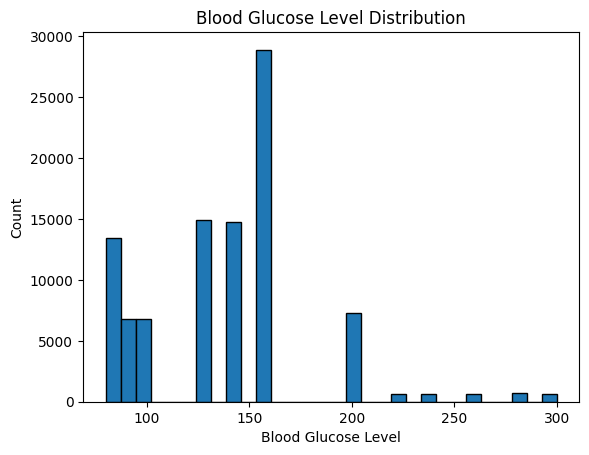

In [ ]:
# Histogram for Blood Glucose Level
plt.hist(df['blood_glucose_level'], bins=30, edgecolor='black')
plt.title('Blood Glucose Level Distribution')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Count')
plt.show()

#### Categorical
* Gender
* Hypertension
* Heart Disease
* Diabetes
* Smoking History

##### I. Gender

In [ ]:
df['gender'].value_counts()

Female    56161
Male      39967
Name: gender, dtype: int64

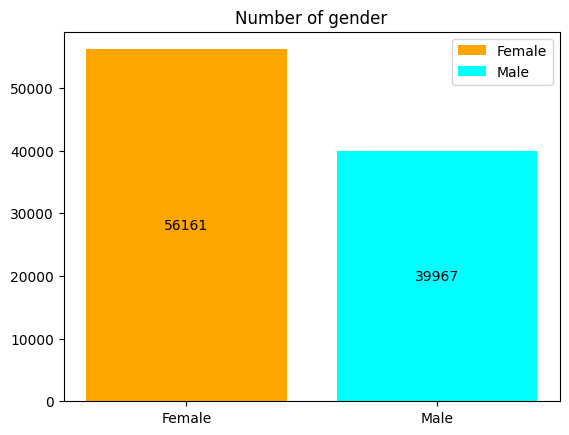

In [ ]:
# Bar plot for gender
gender_val = [56161, 39967]
gender_cat = ['Female', 'Male']
gender_clr = ['orange', 'cyan']

fig, ax = plt.subplots()

p = ax.bar(gender_cat, gender_val, color=gender_clr, width=0.8, label=gender_cat)

ax.bar_label(p, label_type='center')
ax.set_title('Number of gender')
ax.legend()

plt.show()

##### II. Hypertension

In [ ]:
df['hypertension'].value_counts()

0    88667
1     7461
Name: hypertension, dtype: int64

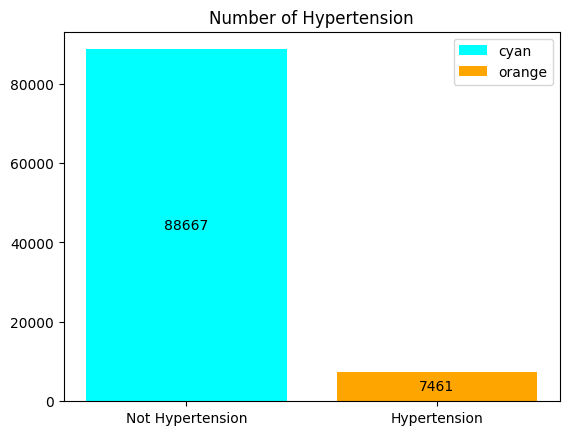

In [ ]:
# Bar plot for Hypertension
hypertension_val = [88667, 7461]
hypertension_cat = ['Not Hypertension', 'Hypertension']
hypertension_clr = ['cyan', 'orange']

fig, ax = plt.subplots()

p = ax.bar(hypertension_cat, hypertension_val, color=hypertension_clr, width=0.8, label=hypertension_clr)

ax.bar_label(p, label_type='center')
ax.set_title('Number of Hypertension')
ax.legend()

plt.show()

##### III. Heart Disease

In [ ]:
df['heart_disease'].value_counts()

0    92205
1     3923
Name: heart_disease, dtype: int64

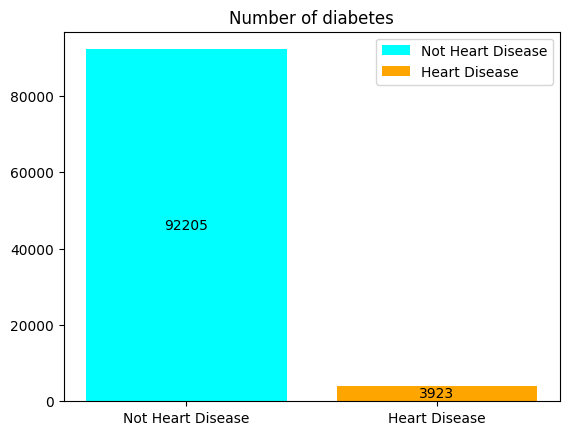

In [ ]:
dia_key = ['Not Heart Disease', 'Heart Disease']
dia_val = [df['heart_disease'].value_counts()[0], df['heart_disease'].value_counts()[1]]
dia_clr = ['cyan', 'orange']

fig, ax = plt.subplots()

p = ax.bar(dia_key, dia_val, color=dia_clr, width=0.8, label=dia_key)

ax.bar_label(p, label_type='center')
ax.set_title('Number of diabetes')
ax.legend()

plt.show()

##### IV. Diabetes

In [ ]:
df['diabetes'].value_counts()

0    87646
1     8482
Name: diabetes, dtype: int64

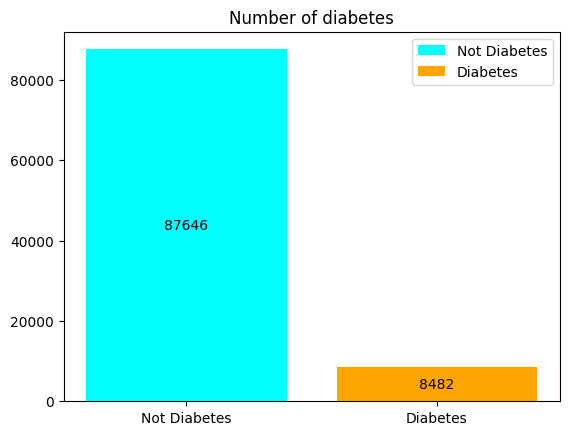

In [ ]:
dia_key = ['Not Diabetes', 'Diabetes']
dia_val = [df['diabetes'].value_counts()[0], df['diabetes'].value_counts()[1]]
dia_clr = ['cyan', 'orange']

fig, ax = plt.subplots()

p = ax.bar(dia_key, dia_val, color=dia_clr, width=0.8, label=dia_key)

ax.bar_label(p, label_type='center')
ax.set_title('Number of diabetes')
ax.legend()

plt.show()

##### V. Smoking History

In [ ]:
df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

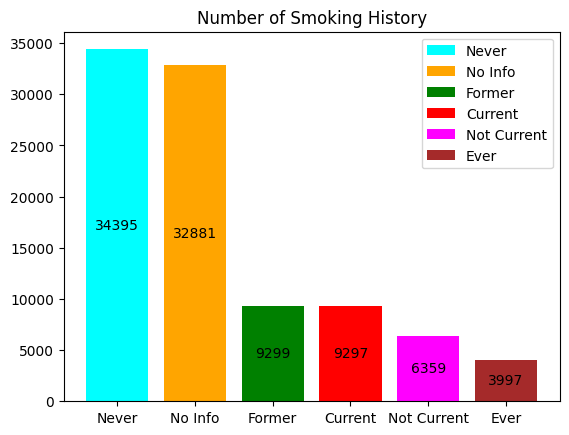

In [ ]:
# Barplot for Smoking History
smoking_history_val = [34395, 32881, 9299, 9297, 6359, 3997]
smoking_history_cat = ['Never', 'No Info', 'Former', 'Current', 'Not Current', 'Ever']
smoking_history_clr = ['cyan', 'orange', 'green', 'red', 'magenta', 'brown']

fig, ax = plt.subplots()

p = ax.bar(smoking_history_cat, smoking_history_val, color=smoking_history_clr, width=0.8, label=smoking_history_cat)

ax.bar_label(p, label_type='center')
ax.set_title('Number of Smoking History')
ax.legend()

plt.show()

### 3. Bivariate Analysis

#### I.  Boxplot BMI vs Diabetes classification

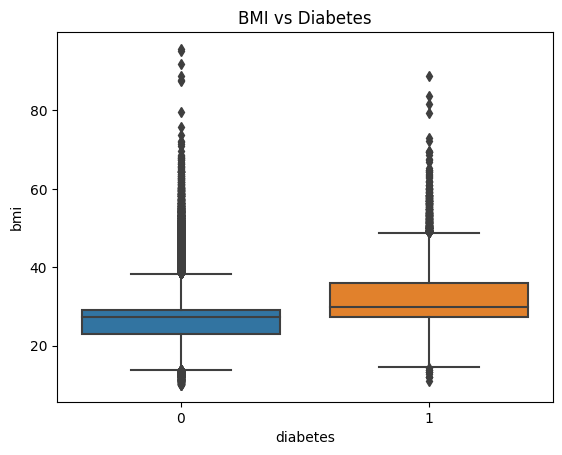

In [ ]:
# Boxplot BMI vs Diabetes classification
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

#### II. Boxplot Age vs Diabetes classification

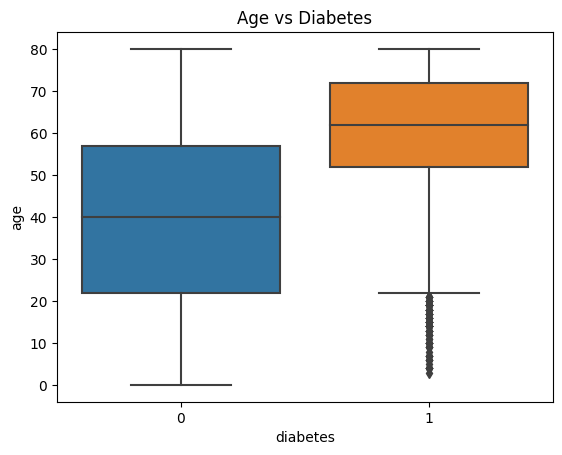

In [ ]:
# Boxplot Age vs Diabetes classification
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

#### III. Count plot of gender vs diabetes

In [ ]:
# Number of Diabetes by Female
df_female_gender = df[df['gender']=='Female']
print(df_female_gender.shape, '\n')

df_female_gender.groupby('diabetes').size()

(56161, 9) 



diabetes
0    51714
1     4447
dtype: int64

In [ ]:
# Number of Diabetes by Male
df_male_gender = df[df['gender']=='Male']
print(df_male_gender.shape, '\n')

df_male_gender.groupby('diabetes').size()

(39967, 9) 



diabetes
0    35932
1     4035
dtype: int64

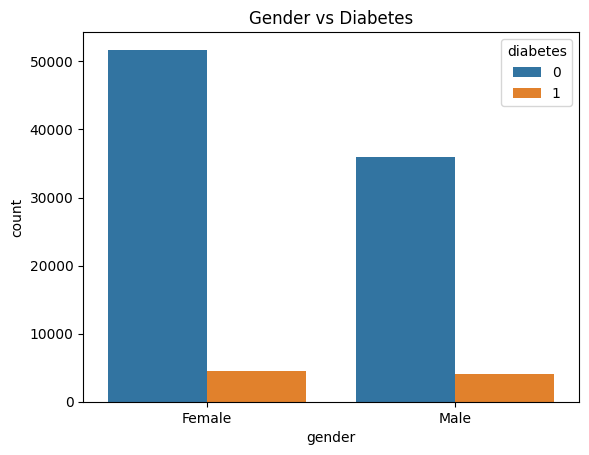

In [ ]:
# Count plot of gender vs diabetes
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

#### IV. Boxplot HbA1c level vs Diabetes classification

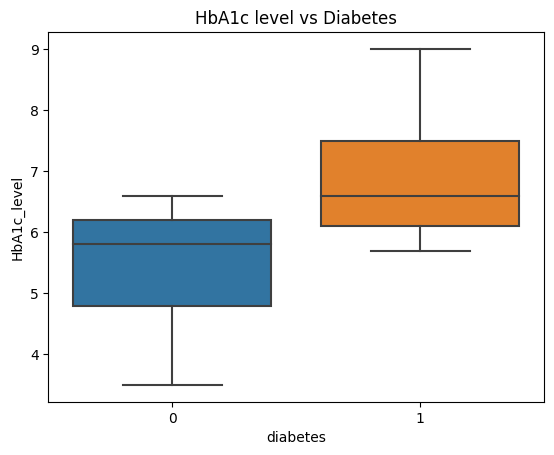

In [ ]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='HbA1c_level', data=df)
plt.title('HbA1c level vs Diabetes')
plt.show()

####  V. Boxplot blood glucose level vs Diabetes classification

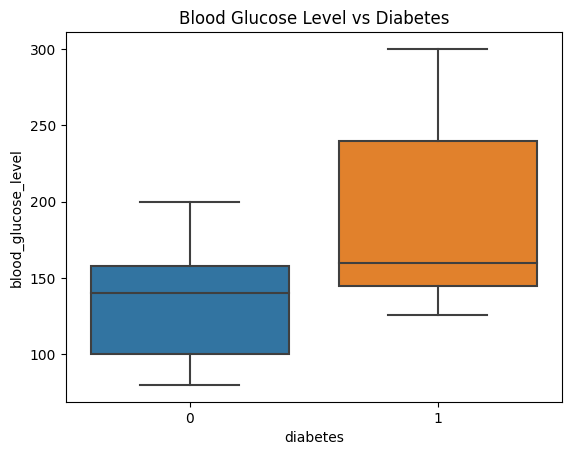

In [ ]:
# Boxplot HbA1c level vs Diabetes classification
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()

#### VI.  Pair plot for numeric features

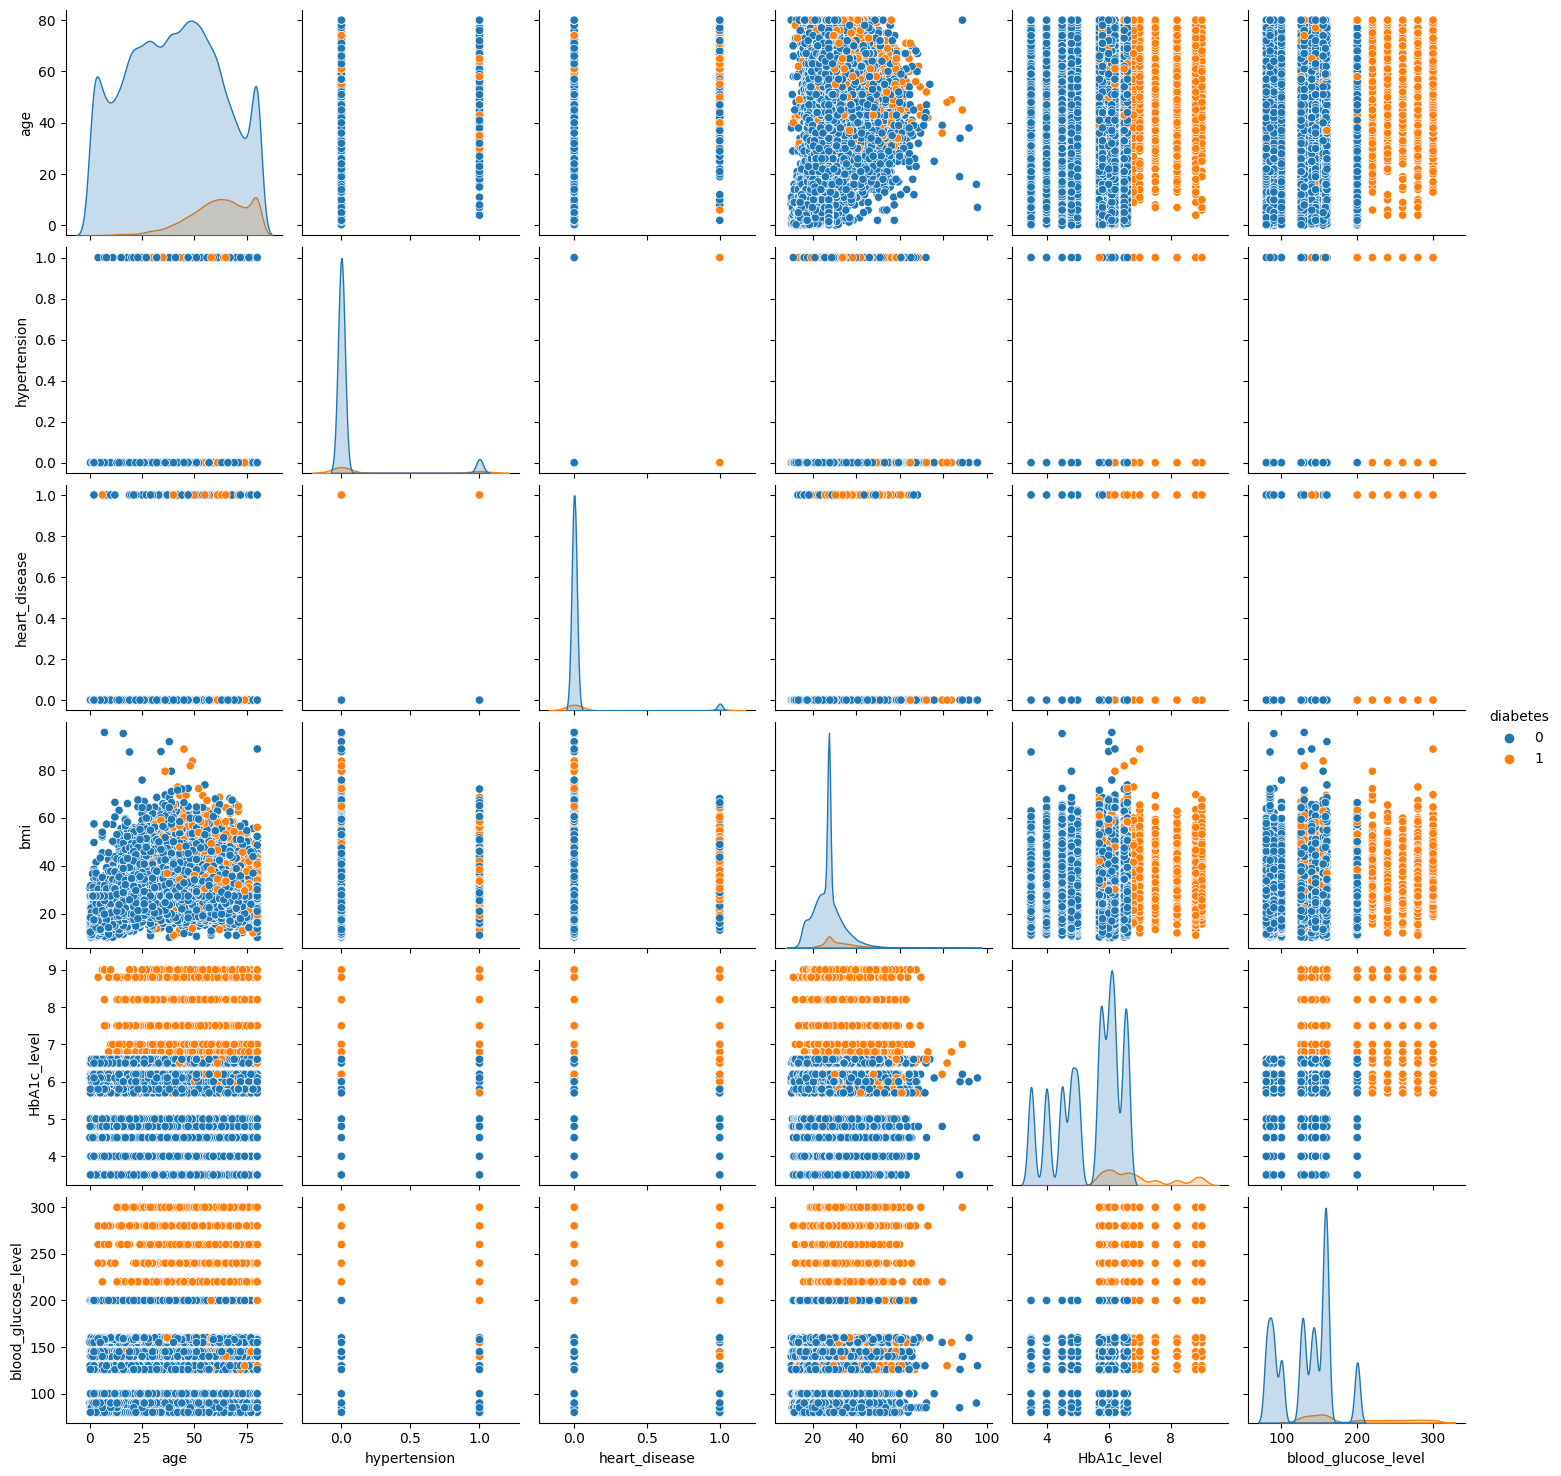

In [ ]:
sns.pairplot(data=df, hue='diabetes')
plt.show()

### 4. Multivariate Analysis

#### I. Scatterplot Age vs BMI colored by Diabetes classification

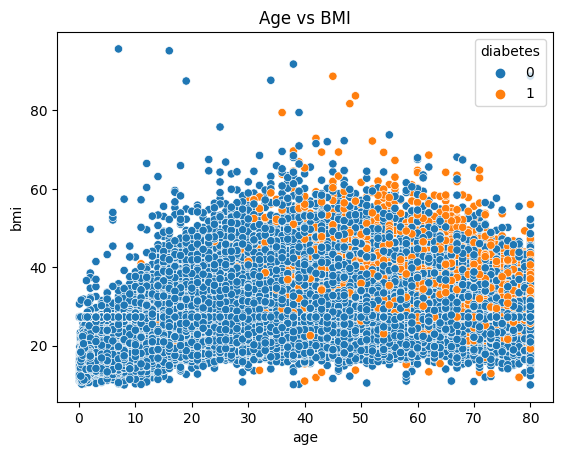

In [ ]:
# Scatterplot Age vs BMI colored by Diabetes classification
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

#### II. Violin plot of BMI against diabetes classification split by gender

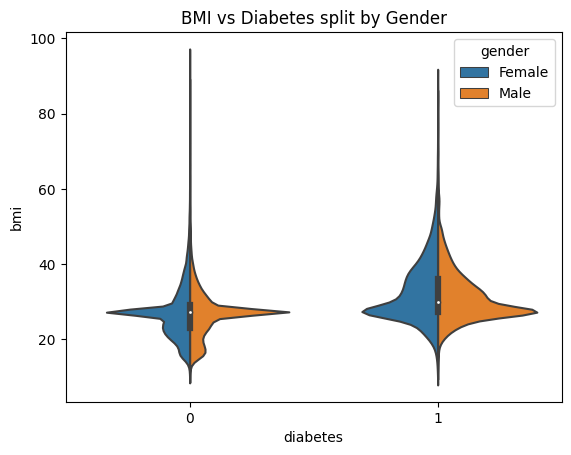

In [ ]:
# Violin plot of BMI against diabetes classification split by gender
sns.violinplot(x='diabetes', y='bmi', hue='gender', split=True, data=df)
plt.title('BMI vs Diabetes split by Gender')
plt.show()

#### III. Interaction between gender, BMI and diabetes

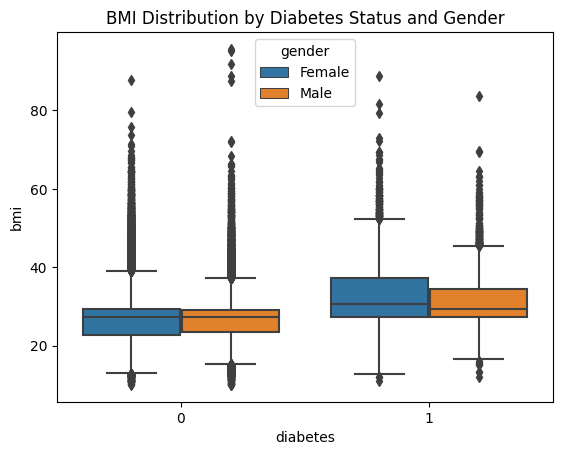

In [ ]:
# Interaction between gender, BMI and diabetes
sns.boxplot(x='diabetes', y='bmi', hue='gender', data=df)
plt.title('BMI Distribution by Diabetes Status and Gender')
plt.show()

#### IV. Interaction between gender, Age and diabetes

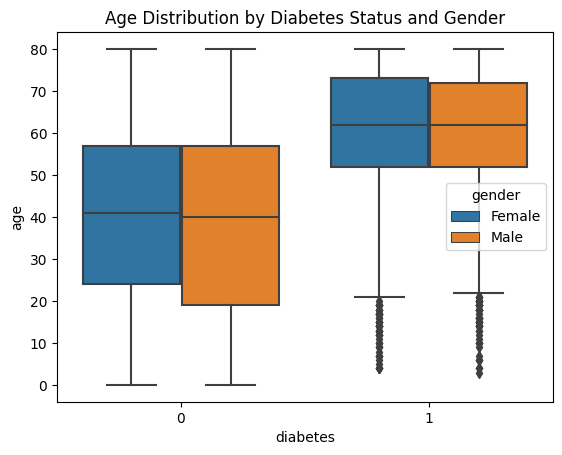

In [ ]:
# Interaction between gender, Age and diabetes
sns.boxplot(x='diabetes', y='age', hue='gender', data=df)
plt.title('Age Distribution by Diabetes Status and Gender')
plt.show()

## B. Correlation

### I. Data Preparation

In [ ]:
# Define a function to map the existing categories to new ones
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past-smoker'

# Apply the function to the 'smoking_history' column
df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

# Check the new value counts
print(df['smoking_history'].value_counts())

non-smoker     67276
past-smoker    19655
current         9197
Name: smoking_history, dtype: int64


In [ ]:
data = df.copy()

In [ ]:
print(data.shape, '\n')
data.head()

(96128, 9) 



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,non-smoker,25.19,6.6,140,0
1,Female,54.0,0,0,non-smoker,27.32,6.6,80,0
2,Male,28.0,0,0,non-smoker,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


### II. Encoding

In [ ]:
def perform_one_hot_encoding(df, column_name):
    # Perform one-hot encoding on the specified column
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    # Drop the original column and append the new dummy columns to the dataframe
    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

In [ ]:
# Perform one-hot encoding on the gender variable
data = perform_one_hot_encoding(data, 'gender')

In [ ]:
# Perform one-hot encoding on the smoking history variable
data = perform_one_hot_encoding(data, 'smoking_history')

In [ ]:
# Display the data after one hot encoding
print(data.shape)
data.head()

(96128, 12)


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_non-smoker,smoking_history_past-smoker
0,80.0,0,1,25.19,6.6,140,0,1,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,1,0,0


### III. Correlation Matrix

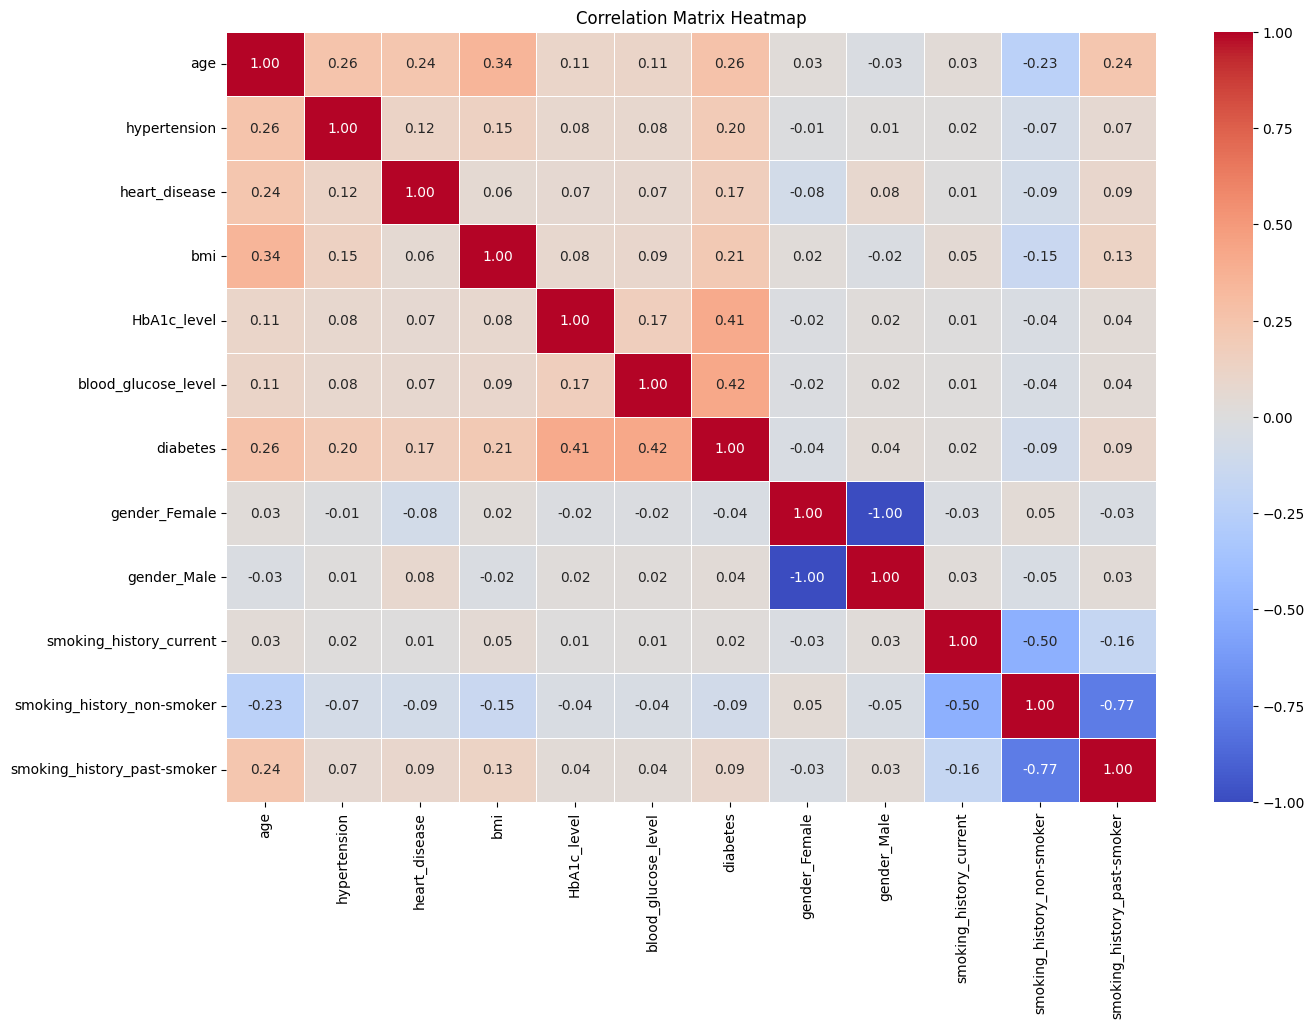

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()
# Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

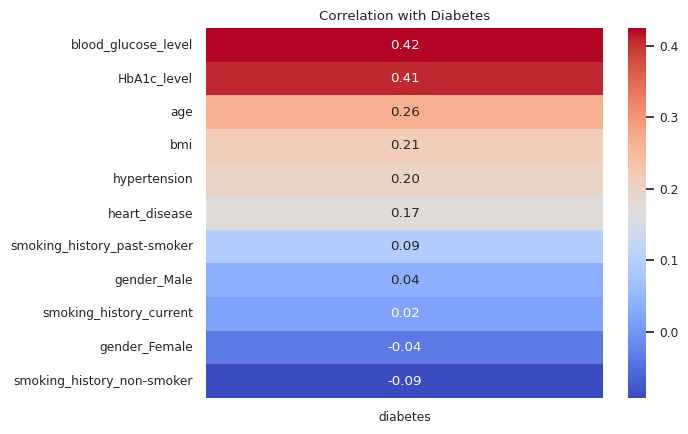

In [ ]:
# Graph II
# Create a heatmap of the correlations with the target column
corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

## C. Predictive Analysis

### I. Class Imbalance

From the EDA ,the dataset is imbalanced (with **9% positive cases for diabetes** and **91% negative cases**), it's essential to balance the data to ensure that the model doesn't get biased towards the majority class.

For this purpose, the **Synthetic Minority Over-sampling Technique (SMOTE)** is used, which generates synthetic samples for the minority class.

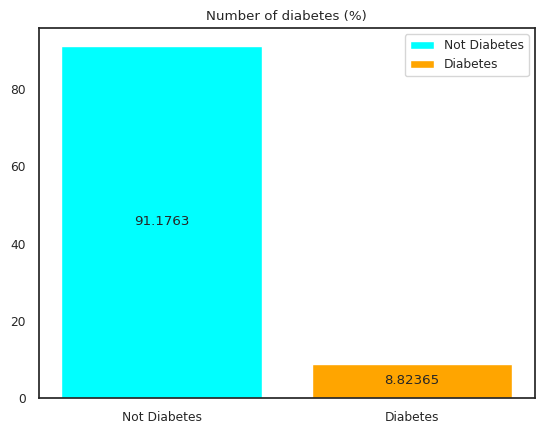

In [ ]:
dia_key = ['Not Diabetes', 'Diabetes']

non_dia = (df['diabetes'].value_counts()[0]/96128)*100
dia = (df['diabetes'].value_counts()[1]/96128)*100
dia_val = [non_dia, dia]

dia_clr = ['cyan', 'orange']

fig, ax = plt.subplots()

p = ax.bar(dia_key, dia_val, color=dia_clr, width=0.8, label=dia_key)

ax.bar_label(p, label_type='center')
ax.set_title('Number of diabetes (%)')
ax.legend()

plt.show()

In [ ]:
# Define resampling
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

### II. Data Preprocessing

Preprocessing is a crucial step before training the model.

In this case, numerical features are standardized (mean removed and scaled to unit variance), and categorical features are one-hot encoded.

* **Standardization** is not required for all models but is generally a good practice.

* **One-hot encoding** is necessary for categorical variables to be correctly understood by the machine learning model.

The *StandardScaler* in sklearn is based on the assumption that the data, Y, follows a distribution that might not necessarily be Gaussian (normal), but we still transform it in a way that its distribution will have a mean value 0 and standard deviation of 1.

In other words, given a feature vector x, it modifies the values as follows:

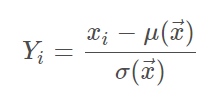

**Where :**

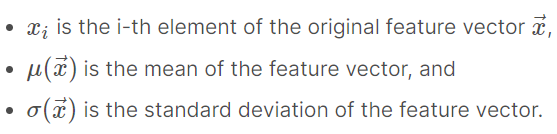


The transformed data **Y** (each  Yi) will have properties such that  mean(Y)=0 and std(Y)=1.



> This transformation is also known as Z-score normalization.



In [ ]:
# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level',
                                   'hypertension','heart_disease']),
        ('cat', OneHotEncoder(), ['gender','smoking_history'])
    ])

In [ ]:
# Split data into features and target variable
X = df.drop('diabetes', axis=1)
y = df['diabetes']

### III. Model Building & Hyperparameter Tuning

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [ ]:
logr = imbPipeline(steps=[('preprocessor', preprocessor),
                       ('over', over),
                       ('under', under),
                       ('logistic', LogisticRegression())])

In [ ]:
param_grid = {
    'logistic__penalty': ['l2'],
    'logistic__C': [100, 10, 1.0, 0.1, 0.01],
    'logistic__solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'logistic__max_iter': [100, 1000],
    'logistic__verbose': [0]
}

In [ ]:
# Create Grid Search object
grids = GridSearchCV(logr, param_grid, cv=5)

# Train the model
grids.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grids.best_params_)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Newton iter=1
  Check Convergence
    1. max |gradient| 0.07879226635979332 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.03061066759004926 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.010748348182692139 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.0026080066102162213 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 0.0002303550573435388 <= 0.0001
Newton iter=6
  Check Convergence
    1. max |gradient| 1.9464456871802884e-06 <= 0.0001
    2. Newton decrement 2.483308956335136e-06 <= 0.0001
  Solver did converge at loss = 0.2336018302030086.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.0783909238059526 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.03052284332060609 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.010787408582969619 <= 0.0001


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 1 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 1 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #3. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=3.46956e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #3. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing 

Newton iter=1
  Check Convergence
    1. max |gradient| 0.08032577545533735 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.41547e-17): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.08014487988803976 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.02348e-17): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.07994448243284186 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=7.7401e-18): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.07988765089812504 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=9.9642e-18): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.07933408928031208 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.2946e-17): result may not be accurate.
  warnings.warn(


convergence after 24 epochs took 1 seconds
convergence after 21 epochs took 0 seconds
convergence after 26 epochs took 0 seconds
convergence after 20 epochs took 0 seconds
convergence after 24 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Newton iter=1
  Check Convergence
    1. max |gradient| 0.08049151379906516 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.031296584482352084 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.0110275828454283 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.0027115947353347496 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 0.0002511030667972028 <= 0.0001
Newton iter=6
  Check Convergence
    1. max |gradient| 2.3835596755179334e-06 <= 0.0001
    2. Newton decrement 3.171577338821266e-06 <= 0.0001
  Solver did converge at loss = 0.2286612253288761.
Newton iter=1
  Check Convergence
    1. max

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=5.83802e-17): result may not be accurate.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing 

Newton iter=1
  Check Convergence
    1. max |gradient| 0.07985062656132771 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.23602e-18): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.07994870131793085 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.64204e-17): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.08001712258672981 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.2316e-17): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.07974069409910538 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=9.09058e-17): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.07982516617018592 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.44366e-17): result may not be accurate.
  warnings.warn(


convergence after 25 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
convergence after 22 epochs took 0 seconds
convergence after 25 epochs took 0 seconds
convergence after 23 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Newton iter=1
  Check Convergence
    1. max |gradient| 0.07842257121966377 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.03063709559876071 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.01091181373303569 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.002729498847226793 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 0.0002580924516644642 <= 0.0001
Newton iter=6
  Check Convergence
    1. max |gradient| 2.5300411007273658e-06 <= 0.0001
    2. Newton decrement 3.370290030526543e-06 <= 0.0001
  Solver did converge at loss = 0.22998881859104425.
Newton iter=1
  Check Convergence
    1. max

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 1 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 1 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 1 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 1 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[LibLinear][LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

Newton iter=1
  Check Convergence
    1. max |gradient| 0.08108501046701057 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.0314473402612834 <= 0.0001
Newton iter=3
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.97883e-17): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.07939069188157087 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=2.14437e-18): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.07912130402536466 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.38844e-17): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.08049917787460015 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=7.48914e-17): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.08137085917946503 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

convergence after 22 epochs took 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


convergence after 21 epochs took 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


convergence after 24 epochs took 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


convergence after 22 epochs took 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


convergence after 25 epochs took 0 seconds
[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Newton iter=1
  Check Convergence
    1. max |gradient| 0.07940190140777516 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.03107454459855608 <= 0.0001
Newton iter=3
  Check Convergence
    1. max |gradient| 0.011092037926640031 <= 0.0001
Newton iter=4
  Check Convergence
    1. max |gradient| 0.002800422837924002 <= 0.0001
Newton iter=5
  Check Convergence
    1. max |gradient| 0.0002739405293426733 <= 0.0001
Newton iter=6
  Check Convergence
    1. max |gradient| 2.9129902034938685e-06 <= 0.0001
    2. Newton decrement 3.892013112552546e-06 <= 0.0001
  Solver did converge at loss = 0.2273860081329111.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.07989723972520636 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.031051390707108974 <= 0.0001
Newton iter=3
  Check Convergence
    1. ma

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


max_iter reached after 3 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


convergence after 998 epochs took 4 seconds
convergence after 813 epochs took 4 seconds
convergence after 997 epochs took 3 seconds
max_iter reached after 4 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C a

[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[LibLinear]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

Newton iter=1
  Check Convergence
    1. max |gradient| 0.08024999740662275 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 0.03134019950607324 <= 0.0001
Newton iter=3
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.64141e-17): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.07992162458491048 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.77569e-18): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.08037922284512847 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=3.11104e-17): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.08086041547446875 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=3.84206e-18): result may not be accurate.
  warnings.warn(


Newton iter=1
  Check Convergence
    1. max |gradient| 0.07972173562148993 <= 0.0001
Newton iter=2
  The inner solver stumbled upon an singular or ill-conditioned Hessian matrix and resorts to LBFGS instead.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

convergence after 21 epochs took 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


convergence after 23 epochs took 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


convergence after 24 epochs took 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


convergence after 22 epochs took 0 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_la

convergence after 24 epochs took 0 seconds
Best Parameters:  {'logistic__C': 10.0, 'logistic__max_iter': 100, 'logistic__penalty': None, 'logistic__solver': 'newton-cholesky', 'logistic__verbose': 0}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_glm/_newton_solver.py:491: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.54362e-17): result may not be accurate.
  warnings.warn(


#### Random Forest

In [ ]:
# Create a pipeline that preprocesses the data, resamples data, and then trains a classifier
rfc = imbPipeline(steps=[('preprocessor', preprocessor),
                       ('over', over),
                       ('under', under),
                       ('classifier', RandomForestClassifier())])

In [ ]:
# Define the hyperparameters and the values we want to test
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create Grid Search object
grid_search = GridSearchCV(rfc, param_grid, cv=5)

# Train the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}


#### Naive Bayes

In [ ]:
gnb = imbPipeline(steps=[('preprocessor', preprocessor),
                       ('over', over),
                       ('under', under),
                       ('gaussian', GaussianNB())])

In [ ]:
param_grid = {
    'gaussian__priors': [None, 0.5],
    'gaussian__var_smoothing': [1e-6, 1e-9]
}

In [ ]:
# Create Grid Search object
grid = GridSearchCV(gnb, param_grid, cv=5)

# Train the model
grid.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/imblearn/pipeline.py", line 297, in fit
    self._final_estimator.fit(Xt, yt, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 265, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/

Best Parameters:  {'gaussian__priors': None, 'gaussian__var_smoothing': 1e-06}


### IV. Confusion Matrix and Performance Metrics

The trained model is evaluated on the test set. Confusion matrix is used to visualize the performance of the model. It shows the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) predictions of the model.

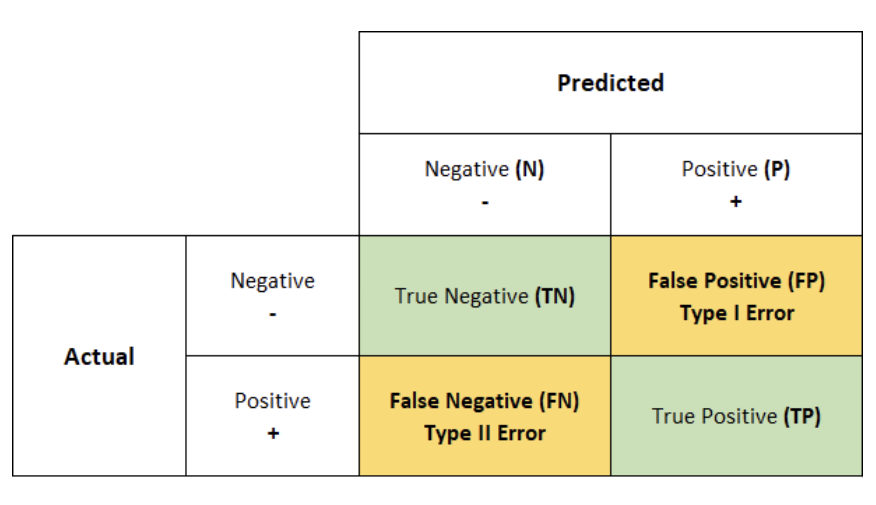

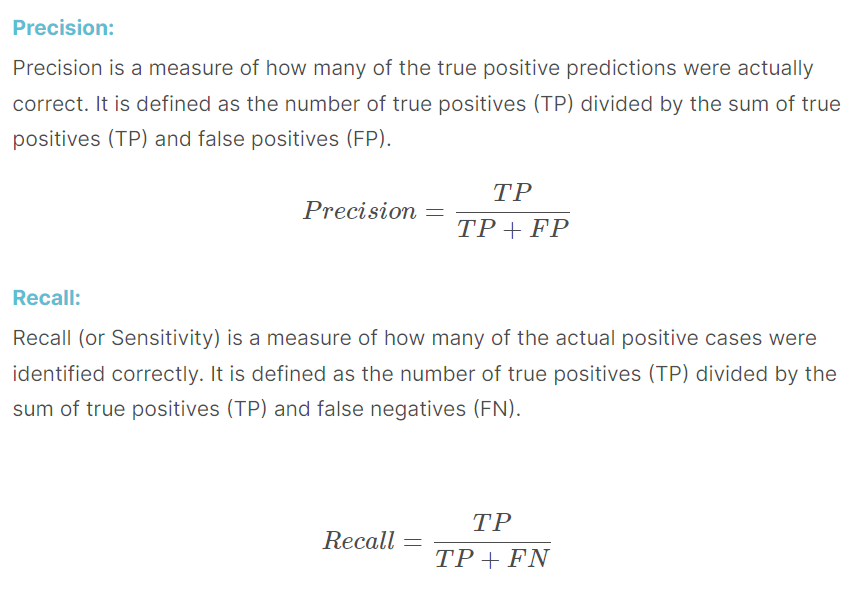

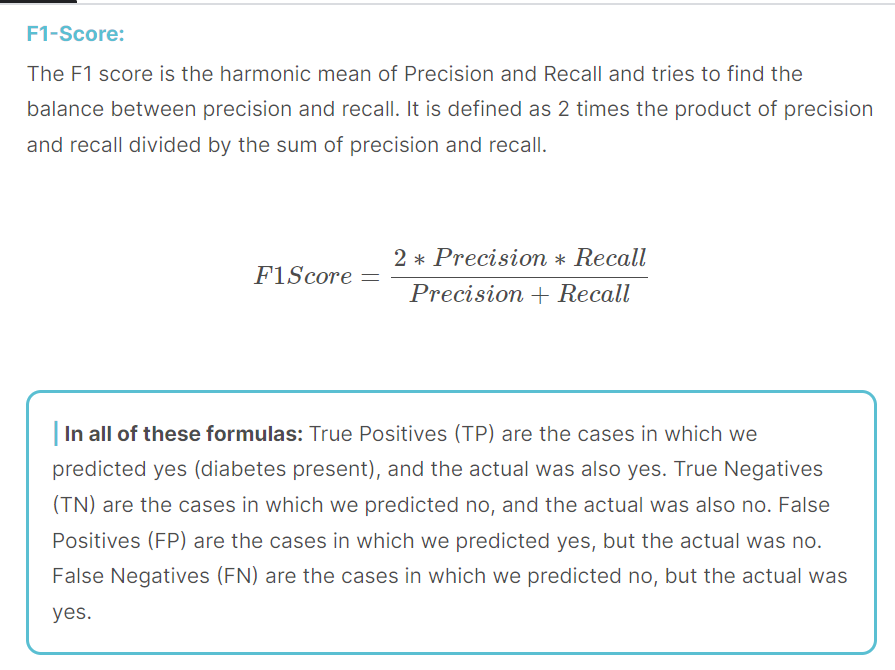

#### Logistic Regression

In [ ]:
# Predict on the test set using the best model
y_predict = grids.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_predict), '\n')
print(classification_report(y_test, y_predict))

Model Accuracy:  0.9247373348590451 

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     17525
           1       0.55      0.79      0.65      1701

    accuracy                           0.92     19226
   macro avg       0.77      0.86      0.80     19226
weighted avg       0.94      0.92      0.93     19226



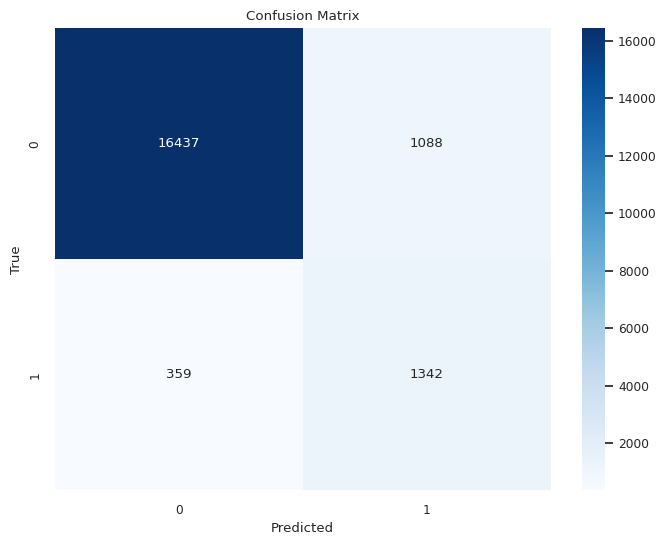

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Random Forest

In [ ]:
# Predict on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pred), '\n')
print(classification_report(y_test, y_pred))

Model Accuracy:  0.9504317070633517 

              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17525
           1       0.69      0.79      0.74      1701

    accuracy                           0.95     19226
   macro avg       0.84      0.88      0.86     19226
weighted avg       0.95      0.95      0.95     19226



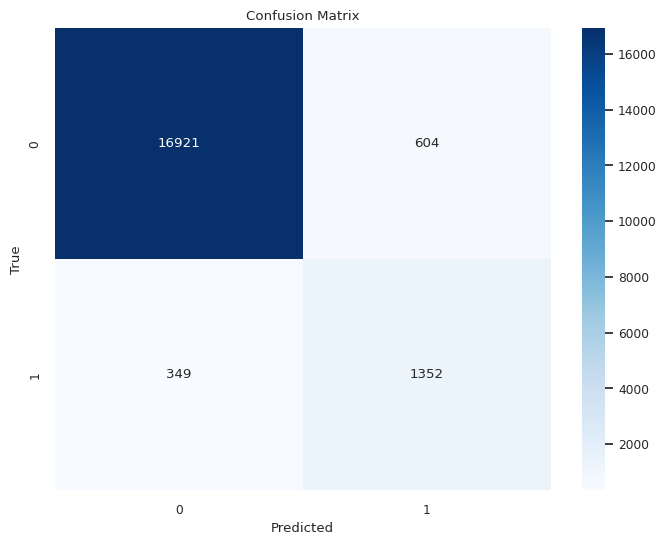

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Naive Bayes

In [ ]:
# Predict on the test set using the best model
y_pre = grid.predict(X_test)

# Evaluate the model
print("Model Accuracy: ", accuracy_score(y_test, y_pre), '\n')
print(classification_report(y_test, y_pre))

Model Accuracy:  0.8882242796213461 

              precision    recall  f1-score   support

           0       0.97      0.90      0.94     17525
           1       0.42      0.74      0.54      1701

    accuracy                           0.89     19226
   macro avg       0.70      0.82      0.74     19226
weighted avg       0.92      0.89      0.90     19226



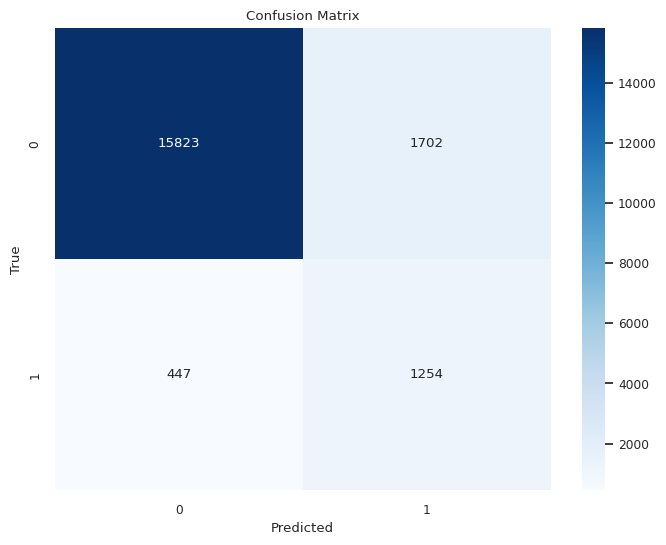

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pre)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()